# Estabilidad numérica

Vamos a comparar dos métodos diferentes para calcular la suma de una serie armónica truncada, lo cual es un buen ejemplo de cómo el orden de las operaciones puede afectar la estabilidad numérica.

Este código en Python demuestra la importancia de la estabilidad numérica en los algoritmos, comparando dos métodos para sumar una serie armónica truncada. Aquí está una explicación de lo que hace el código:

  **1)** Definimos dos funciones:

 - **suma_directa(n):** Suma los términos de la serie desde 1/1 hasta 1/n.
 - **suma_inversa(n):** Suma los términos de la serie desde 1/n hasta 1/1.


  **2)** alculamos las sumas usando ambos métodos para diferentes valores de n, desde 10 hasta 10^7.

  **3)** Calculamos las diferencias relativas entre los dos métodos.

  **4)** Graficamos los resultados de ambos métodos y las diferencias relativas.




In [2]:
import numpy as np
import matplotlib.pyplot as plt

def suma_directa(n):
    """
    Calcula la suma de la serie armónica truncada de forma directa.
    Suma desde 1/1 hasta 1/n.
    """
    return sum(1/k for k in range(1, n+1))

def suma_inversa(n):
    """
    Calcula la suma de la serie armónica truncada en orden inverso.
    Suma desde 1/n hasta 1/1.
    """
    return sum(1/k for k in range(n, 0, -1))

# Calcular sumas para diferentes valores de n
n_values = [10**i for i in range(1, 8)]
sumas_directas = [suma_directa(n) for n in n_values]
sumas_inversas = [suma_inversa(n) for n in n_values]

# Calcular las diferencias relativas
diferencias = [abs(d - i) / i for d, i in zip(sumas_directas, sumas_inversas)]



## Resultados gráficos:

- La línea azul representa la suma directa.
- La línea roja representa la suma inversa.
- Notarás que para valores grandes de n, los resultados empiezan a diverger.

### En el primer gráfico:


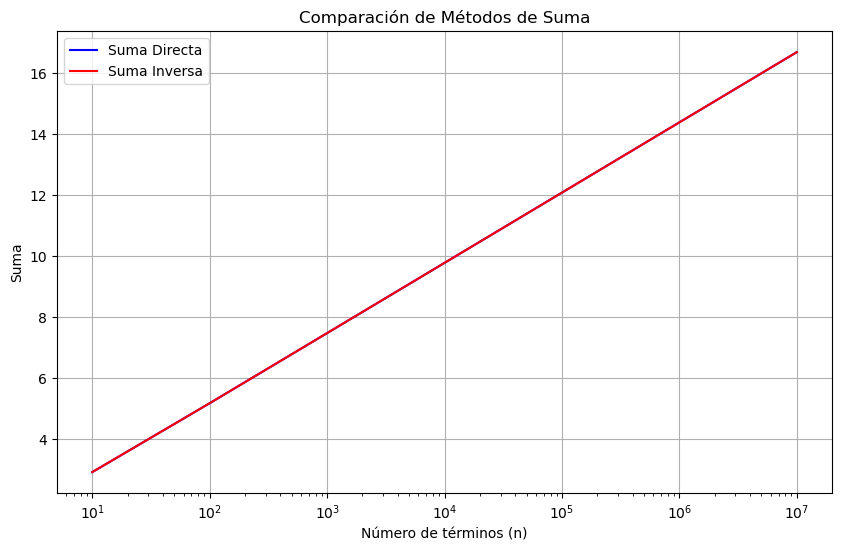

In [7]:
# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.semilogx(n_values, sumas_directas, 'b-', label='Suma Directa')
plt.semilogx(n_values, sumas_inversas, 'r-', label='Suma Inversa')
plt.xlabel('Número de términos (n)')
plt.ylabel('Suma')
plt.title('Comparación de Métodos de Suma')
plt.legend()
plt.grid(True)
plt.show()

### En el segundo gráfico:

- Muestra la diferencia relativa entre los dos métodos.
- Verás que la diferencia aumenta significativamente para valores grandes de n.

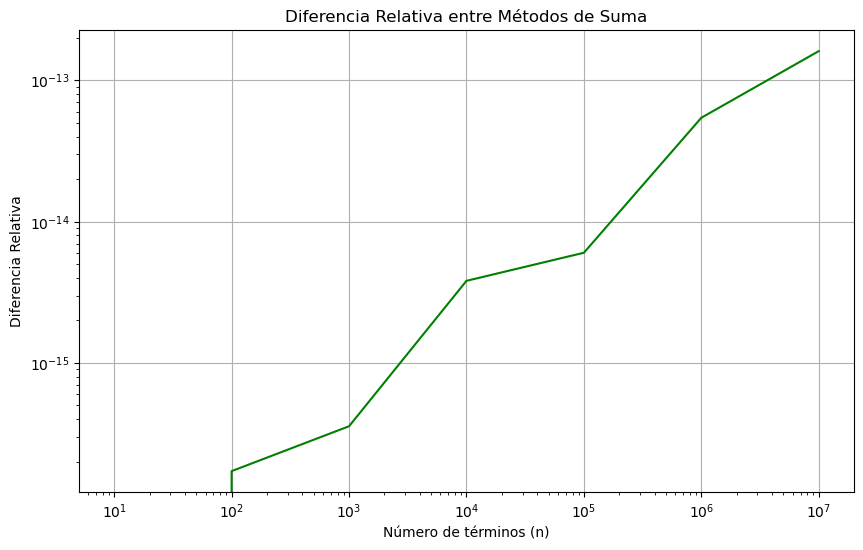

Para n = 10000000:
Suma Directa: 16.695311365857272
Suma Inversa: 16.695311365859965
Diferencia Relativa: 1.613001943789784e-13


In [5]:
# Graficar las diferencias relativas
plt.figure(figsize=(10, 6))
plt.loglog(n_values, diferencias, 'g-')
plt.xlabel('Número de términos (n)')
plt.ylabel('Diferencia Relativa')
plt.title('Diferencia Relativa entre Métodos de Suma')
plt.grid(True)
plt.show()

### En la salida impresa:

Verás los resultados numéricos para el valor más grande de n.

In [8]:
# Imprimir resultados para el valor más grande de n
print(f"Para n = {n_values[-1]}:")
print(f"Suma Directa: {sumas_directas[-1]}")
print(f"Suma Inversa: {sumas_inversas[-1]}")
print(f"Diferencia Relativa: {diferencias[-1]}")

Para n = 10000000:
Suma Directa: 16.695311365857272
Suma Inversa: 16.695311365859965
Diferencia Relativa: 1.613001943789784e-13


## Discusión 


Este ejemplo ilustra varios puntos importantes sobre la estabilidad numérica:

 - **Orden de las operaciones:** Aunque matemáticamente el orden de la suma no debería importar, computacionalmente sí importa debido a la precisión finita de los números de punto flotante.

 - **Acumulación de errores:** En la suma directa, los términos más pequeños (1/n) se suman al final, cuando la suma ya es grande. Esto puede llevar a que estos términos pequeños se "pierdan" debido a la precisión limitada.

 - **Cancelación catastrófica:** En problemas más complejos, la resta de números muy cercanos puede llevar a una pérdida significativa de precisión.
 
- **Importancia del diseño del algoritmo:** Este ejemplo muestra cómo dos algoritmos matemáticamente equivalentes pueden dar resultados numéricamente diferentes. En la práctica, es crucial elegir algoritmos que sean numéricamente estables.

Este ejemplo demuestra por qué es importante considerar tanto la exactitud como la precisión al diseñar algoritmos numéricos. En este caso, la suma inversa es generalmente más precisa porque minimiza la pérdida de información de los términos más pequeños.